In [3]:
import tellurium as te

In [15]:
dosingmodel_str = '''

model dosingmodel()

// Simple cascade model of bioiavailability with multiple metabolites
// linear clearance at each stage
// All times measured in Days

J0: Drug -> Available1 ; k0*Drug ; //Distribution and bioavailability of drug after dosing
J0A: Drug -> ; d0*Drug ; // Clearance of drug before bioavailability
J1: Available1 -> Available2 ; k1*Available1 ; // Metabolism of drug into metabolite 2
J1A: Available1 -> ; d1*Available1 ; // Clearance of drug after bioavailability
J2: Available2 -> Available3 ; k2*Available2 ; // Metabolism of drug into metabolite 3
J2A: Available2 -> ; d2*Available2 ; // Clearance of metabolite 2 
J3: Available3 -> Available4 ; k3*Available3 ; // Metabolism of drug into metabolite 4
J3A: Available3 -> ; d3*Available3 ; // Clearance of metabolite 3 
J4A: Available4 -> ; d4*Available4 ; // Clearance of metabolite 4

//Initial values
Drug = 0 ; //No initial Drug
Available1 = 0 ; // No initial bioavailable drug
Available2 = 0 ; // No initial bioavailable metabolite 2
Available3 = 0 ; // No initial bioavailable drug
Available4 = 0 ; // No initial bioavailable drug

k0 = 100.0 ; // bioavailability rate, units /day = 15 minutes
d0 = 1.0 ; // clearance time, units /day 
k1 = 25.0 ; // metabolism of primary drug rate, units /day = 1 hour
d1 = 6.0 ; // clearance time, units /day = 4 hours
k2 = 25.0 ; // metabolism of secondary product, units /day = 1 hour
d2 = 6.0 ; // clearance time, units /day = 4 hours
k3 = 25.0 ; // metabolism of tertiary product, units /day = 1 hour
d3 = 6.0 ; // clearance time, units /day = 4 hours
d4 = 6.0 ; // clearance time, units /day = 4 hours

first_dose=0.5 ; // time of first dose in days
initial_dose = 10 ; // initial dose (arbitrary amount)
dose_interval = 0.25 ; // time interval between doses in days
dose = 10 ; //dose of subsequent treatments

E1: at (time>first_dose): Drug=Drug+initial_dose ;
E2: at ( (time-first_dose > 0) && sin((((time-first_dose)/dose_interval))*2*pi)>0): Drug=Drug+dose
end
'''

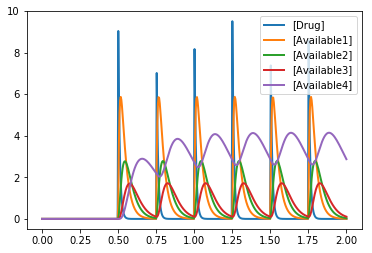

In [16]:
r=te.loada(dosingmodel_str)
r.simulate(0,2,500)
r.plot()